<a href="https://colab.research.google.com/github/DGKobelev/Home/blob/main/%D0%A2%D0%B5%D0%BB%D0%B5%D0%B3%D1%80%D0%B0%D0%BC%D0%BC_%D0%B1%D0%BE%D1%82/%22%D0%A2%D0%B5%D0%BB%D0%B5%D0%B3%D1%80%D0%B0%D0%BC_%D0%B1%D0%BE%D1%82_%D0%BD%D0%B0_Aiogram3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Телеграм-бот на Aiogram

Телеграм-боты — это специальные аккаунты в мессенджере Telegram, которые автоматизируют взаимодействие с пользователями. Эти боты могут выполнять множество задач, таких как предоставление информации, взаимодействие с пользователями через кнопки и клавиатуры, уведомления, управление различными службами и интеграция с внешними системами. Благодаря своей гибкости и простоте в использовании, телеграм-боты широко применяются в различных сферах, включая маркетинг, поддержку клиентов, проведение опросов и даже в обучении.

## Что такое Telegram Bot API?

Telegram Bot API — это интерфейс программирования приложений, предоставляемый Telegram для взаимодействия с ботами. С помощью этого API разработчики могут создавать ботов, которые могут принимать и отправлять сообщения, обрабатывать различные виды контента, такие как фотографии, видео, документы, и взаимодействовать с пользователями.
##### Документация Telegram Bot API: https://core.telegram.org/bots/api

## Что такое Aiogram?

Aiogram — это асинхронная библиотека на языке Python, предназначенная для создания телеграм-ботов с использованием Telegram Bot API. Версия Aiogram 3, на которой базируется наш курс, предоставляет более гибкие и мощные возможности для разработки телеграм-ботов, делая этот процесс проще и эффективнее.
##### Документация: https://docs.aiogram.dev/en/dev-3.x/
##### GitHub репозиторий Aiogram: https://github.com/aiogram/aiogram/tree/dev-3.x/aiogram

## Получение токена от BotFather в Telegram для нового бота:

1. **Откройте Telegram**:
   Запустите приложение Telegram на своем устройстве.

2. **Найдите BotFather**:
   В строке поиска введите "BotFather" и выберите официальный аккаунт (он должен иметь галочку верификации).

3. **Начните чат**:
   Нажмите на кнопку "Начать" или введите команду `/start` в чате с BotFather.

4. **Создайте нового бота**:
   Введите команду `/newbot`. BotFather спросит вас о названии нового бота.

5. **Укажите имя бота**:
   Напишите любое имя для вашего бота. Это имя будет отображаться пользователям. Они найдут бота по имени пользователя. Желательно дать боту понятное имя, содержащее пробелы (например, "AI Neuro Consultant").

6. **Выберите юзернейм**:
   Затем BotFather попросит вас ввести юзернейм для бота. В нем не должно быть пробелов. Он должен содержать от 5 до 32 символов и может включать латиницу, цифры или символы подчеркивания. Юзернейм должен заканчиваться на "bot" (например, "ai_neuro_consultant_bot").

7. **Получите токен**:
   После успешного создания бота, BotFather отправит вам сообщение с токеном доступа. Он будет выглядеть как длинная строка символов.

8. **Сохраните токен**:
   Сохраните токен в безопасном месте, так как он будет необходим для работы с API Telegram.

Теперь у вас есть токен, и вы можете использовать его для настройки и управления своим ботом!


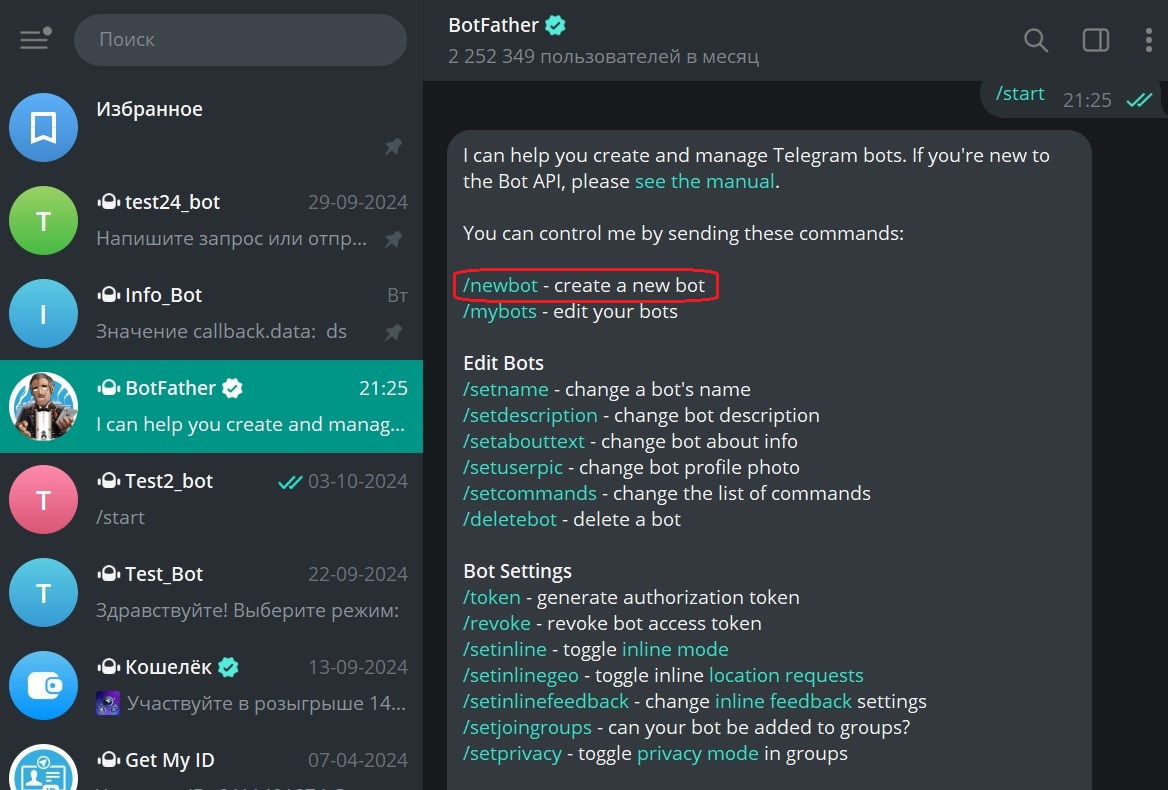



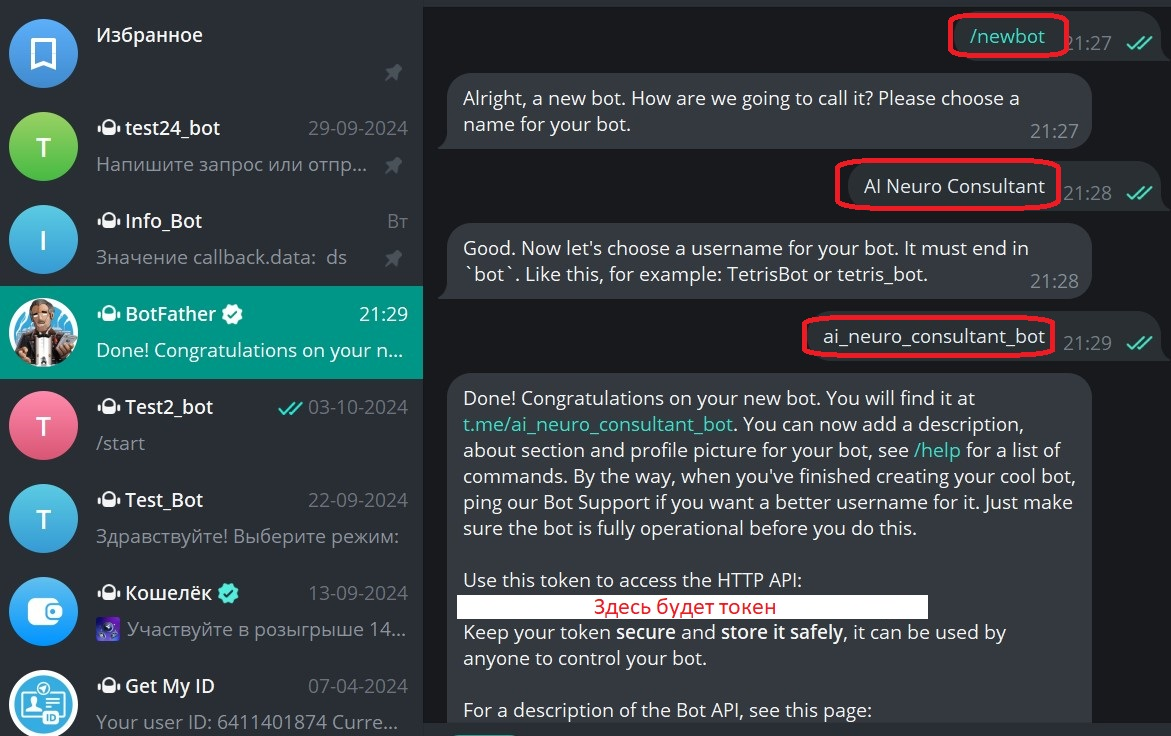

# Создаем Телеграм-бота

In [ ]:
#@title Загрузка и установка библиотек
!pip install -q aiogram==3.13.1

from aiogram.client.default import DefaultBotProperties  # Импорт свойств для настройки бота по умолчанию
from aiogram.enums import ParseMode  # Импорт перечисления режимов парсинга для форматирования сообщений
import logging  # Импорт модуля логирования для отслеживания действий и ошибок в коде
import asyncio  # Импорт asyncio для работы с асинхронными задачами и событиями
from aiogram import Bot, Dispatcher  # Импорт классов бота и диспетчера для работы с Telegram Bot API
from aiogram.types import Message, CallbackQuery, Voice, Document, BotCommand, FSInputFile
from aiogram.types import ReplyKeyboardMarkup, KeyboardButton
from aiogram.types import InlineKeyboardMarkup, InlineKeyboardButton
from aiogram.utils.keyboard import ReplyKeyboardBuilder, InlineKeyboardBuilder
from aiogram.filters import Command  # Импорт фильтра для обработки текстовых команд, таких как /start и /help
from aiogram import F  # Импорт F - для работы с фильтрацией данных сообщений
from google.colab import userdata
import os  # Импорт модуля os для работы с файловой системой и переменными окружения

# Активируем поддержку асинхронных циклов (только для Colab)
# Google Colab не поддерживает обычный асинхронный цикл напрямую, из-за чего используется nest_asyncio
import nest_asyncio
nest_asyncio.apply()

# Токен из секретов Colab
TELEGRAM_TOKEN = userdata.get("TELEGRAM_TOKEN")

In [ ]:
#@title Инициализация бота и диспетчера

# Создание экземпляра бота
bot = Bot(token=TELEGRAM_TOKEN)  # Передаем токен, полученный от BotFather

# Инициализация диспетчера для управления обработчиками событий (сообщения, команды, нажатие кнопок и т.д.)
# Dispatcher используется для регистрации и управления хендлерами, обрабатывающими взаимодействия с ботом
dp = Dispatcher()

**Понятие обработчиков (хендлеров)**

- Хендлеры (от англ. handler) — это функции, которые обрабатывают входящие сообщения и события в телеграм-боте. Когда пользователь отправляет сообщение боту, это сообщение попадает в хендлер, где производится обработка: бот может отвечать на сообщения, выполнять какие-либо действия, отправлять файлы или выполнять другую логику.

- В Aiogram 3 для обработки сообщений используются декораторы, которые помогают зарегистрировать хендлеры в диспетчере. С помощью хендлеров можно обрабатывать разные типы данных, такие как текстовые сообщения, команды, фотографии, видео и другие события, например нажатие кнопок.

**Примеры типов сообщений, которые можно обрабатывать с помощью хендлеров**

- Текстовые сообщения: Бот может реагировать на текст, введенный пользователем, например, приветствовать при написании "Привет".

- Команды: Обработка стандартных команд, таких как /start или /help.

- Мультимедийные сообщения: Бот может обрабатывать изображения, видео, документы, пересылать их и выполнять другие действия.

**Обработка хендлеров в Aiogram**

- В **Aiogram** хендлеры обрабатываются **последовательно**, в том порядке, в котором они зарегистрированы в коде. Это означает, что когда бот получает сообщение или команду, он проходит по всем зарегистрированным хендлерам и проверяет, какой из них соответствует входящему событию. Если хендлер находит совпадение, он выполняет соответствующую функцию и прекращает дальнейшую проверку.

**Важность последовательности**

- Последовательность регистрации хендлеров имеет большое значение, так как это может повлиять на то, какой хендлер будет вызван в ответ на определенное событие. Если два хендлера могут обрабатывать одно и то же событие, то тот, который зарегистрирован первым, будет иметь приоритет. Это может привести к неожиданным результатам, если не учитывать порядок регистрации.

In [ ]:
#@title Настройка команд

# Обработчик команды /start
@dp.message(Command('start'))  # Декоратор, который регистрирует хендлер для обработки команды /start
# @dp.message — это декоратор, регистрирующий обработчик события "получение сообщения"
# Command("start") — это фильтр, который определяет, что данное сообщение должно быть командой /start.
# Только если сообщение пользователя — /start, обработчик сработает.
async def cmd_start(message: Message):
    # message - объект класса Message. Содержит всю информацию о сообщении, полученном ботом: текст, отправителя, время отправки и прочее.
    # https://docs.aiogram.dev/en/latest/api/types/message.html

    # Отправляем приветственное сообщение пользователю
    await message.answer("Привет! Я ваш помощник. Я здесь, чтобы помочь вам. Напишите /help, чтобы узнать больше о моих возможностях.")


# Обработчик команды /help
@dp.message(Command('help'))  # Декоратор, который регистрирует хендлер для обработки команды /help
async def cmd_help(message: Message):
    # Отправляем сообщение с доступными командами и инструкциями для пользователя
    await message.answer("Вот список доступных команд:\n/start - начать работу со мной\n/help - показать это сообщение помощи\n/about - информация обо мне")


# Обработчик команды /about
@dp.message(Command('about'))  # Декоратор, который регистрирует хендлер для обработки команды /about
async def cmd_about(message: Message):
    # Отправляем информацию о боте, его возможностях и назначении
    await message.answer("Я бот, созданный для демонстрации возможностей Aiogram 3. Я могу выполнять различные команды и помогать вам с вашими запросами.")


### Комады 👇

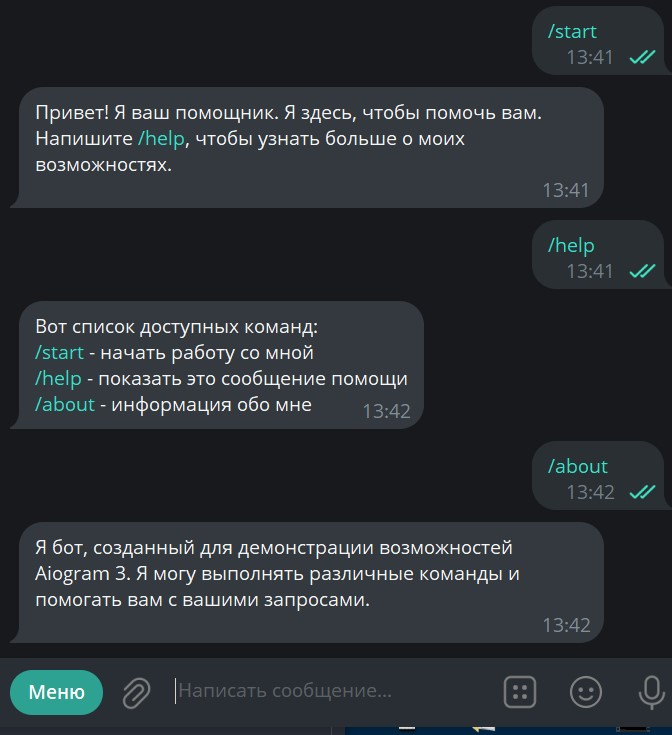

In [ ]:
#@title Меню команд

@dp.startup()  # Устанавливаем действия, которые будут выполнены при старте бота
async def set_menu_button(bot: Bot):
    # Определение основных команд для главного меню - кнопка (Menu) слева внизу
    main_menu_commands = [
        BotCommand(command='/start', description='Start'),  # Добавляем команду /start с описанием "Start"
        BotCommand(command='/model', description='Model LLM'),  # Добавляем команду /model с описанием "Model"
        BotCommand(command='/options', description='Options'),  # Добавляем команду /options с описанием "Options"
        BotCommand(command='/help', description='Help Information'),  # Добавляем команду /help с описанием "Help Information"
        BotCommand(command='/about', description='About this bot')]  # Добавляем команду /about с описанием "About this bot"
    # Устанавливаем основные команды в главное меню бота
    await bot.set_my_commands(main_menu_commands)

### Меню команд 👇


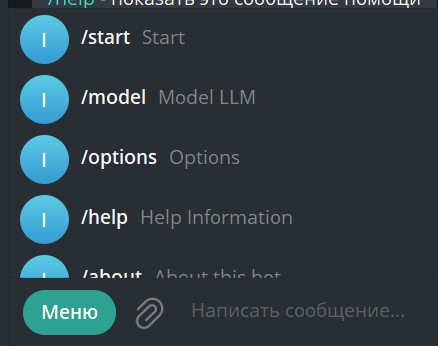

**Что такое MagicFilters (F) в  Aiogram 3**
- https://docs.aiogram.dev/en/latest/dispatcher/filters/magic_filters.html

- MagicFilters (обозначается как F) — это удобный инструмент для фильтрации сообщений и других событий, который предоставляется библиотекой Aiogram 3. С помощью MagicFilters можно легко проверять, соответствует ли сообщение определенным критериям, и реагировать только на нужные события. Это позволяет сократить количество кода и повысить читаемость.

- Фильтр F позволяет фильтровать сообщения по типу контента, наличию текста, медиа или других параметров. Например, можно настроить хендлер так, чтобы он обрабатывал только сообщения, содержащие текст или только изображения.

In [ ]:
#@title Обработка текстовых сообщений

# Ловим все текстовые сообщения, кроме "/model" и "/options". Используем MagicFilters - F
@dp.message(F.text & ~(F.text == "/model") & ~(F.text == "/options"))  # Декоратор для регистрации хендлера сообщений, который будет реагировать на текстовые сообщения.
async def handle_text_message(message: Message):  # Определение асинхронной функции-хендлера, принимающей объект сообщения.
    # message - объект класса Message. Содержит всю информацию о сообщении, полученном ботом: текст, отправителя, время отправки и прочее.
    # https://docs.aiogram.dev/en/latest/api/types/message.html

    await message.answer(f"Вы отправили текстовое сообщение: {message.text}")  # Отправка ответа пользователю с текстом его сообщения.
    await message.answer(f'Ваш Телеграм ID: {message.from_user.id}')  # Отправка сообщения пользователю с его Telegram ID.
    await message.answer(f'Ваш username: {message.from_user.username}') # Отправка сообщения пользователю с его username в Telegram.


### Обработка текстовых сообщений 👇


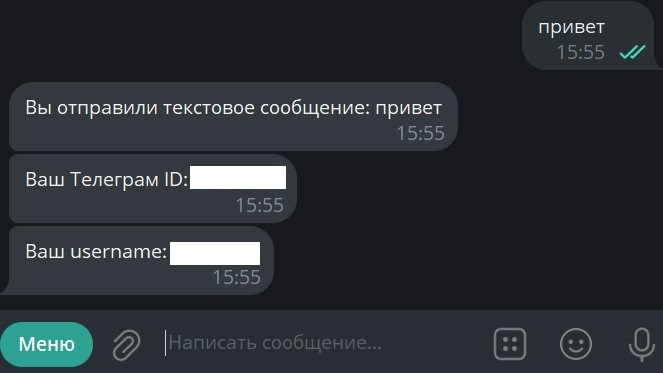

In [ ]:
#@title Обработка фото

@dp.message(F.photo)  # Декоратор для регистрации хендлера сообщений, который будет реагировать на фото.
async def handle_photo_message(message: Message):  # Определение асинхронной функции-хендлера, принимающей объект сообщения.
    # message - объект класса Message. Содержит всю информацию о сообщении, полученном ботом: текст, отправителя, время отправки и прочее.
    # https://docs.aiogram.dev/en/latest/api/types/message.html

    await message.answer("Вы отправили фото")  # Отправка ответа пользователю, подтверждающего получение фото.

    photo = message.photo[-1]  # Берем последнюю (самую высокую по качеству) версию фото.
    # Загрузка и сохранение фото *******************************************************************

    # Сохранение фото (вариант 1)
    file_info = await bot.get_file(photo.file_id)  # Получаем информацию о файле по его file_id.
    file_path = file_info.file_path  # Извлекаем путь к файлу в Телеграм из информации о файле.
    await bot.download_file(file_path,  # Путь к фалу в Телеграм
                            destination=f'{photo.file_unique_id}_1.jpg')  # Сохраняем файл у себя с уникальным именем.
    await message.answer(f"Фото сохранено: {f'{photo.file_unique_id}_1.jpg'}")  # Отправка сообщения

    # Сохранение фото (вариант 2)
    await bot.download(photo,  # Загружаем фото с использованием метода download.
                       destination=f'{photo.file_unique_id}_2.jpg')  # Сохраняем файл у себя с уникальным именем.
    await message.answer(f"Фото сохранено: {f'{photo.file_unique_id}_2.jpg'}")  # Отправка сообщения

    # Отправка фото пользователю *******************************************************************

    # Отправляем фото (вариант 1) назад пользователю
    await message.answer_photo(photo.file_id, caption='Вот ваше фото')

    # Отправляем фото (вариант 2) пользователю по Id
    await bot.send_photo(
        chat_id=message.from_user.id,  # Отправляем фото в чат, используя ID пользователя.
        photo=photo.file_id,  # Указываем file_id фотографии, которую нужно отправить.
        caption="Вот ваше фото!")  # Добавляем подпись к фото, которая будет отображаться пользователю.

    # Создаем объект FSInputFile для отправки файла фото из локального хранилища
    photo_file = FSInputFile(f'{photo.file_unique_id}_1.jpg')
    # Отправляем фото (вариант 3 - answer_document), как документ, обратно пользователю из ранее сохраненного файла
    await message.answer_document(photo_file, caption='Вот ваше фото в виде файла')

    # Отправляем фото (вариант 4 - answer_photo), как фото, обратно пользователю из ранее сохраненного файла
    await message.answer_photo(photo_file, caption='Вот опять ваше сохраненное фото')

    try:
        for i in [1, 2]: # Асинхронное удаление ранее сохраненных фото
            await asyncio.to_thread(os.remove, f'{photo.file_unique_id}_{i}.jpg')
    except: pass


### Обработка фото 👇


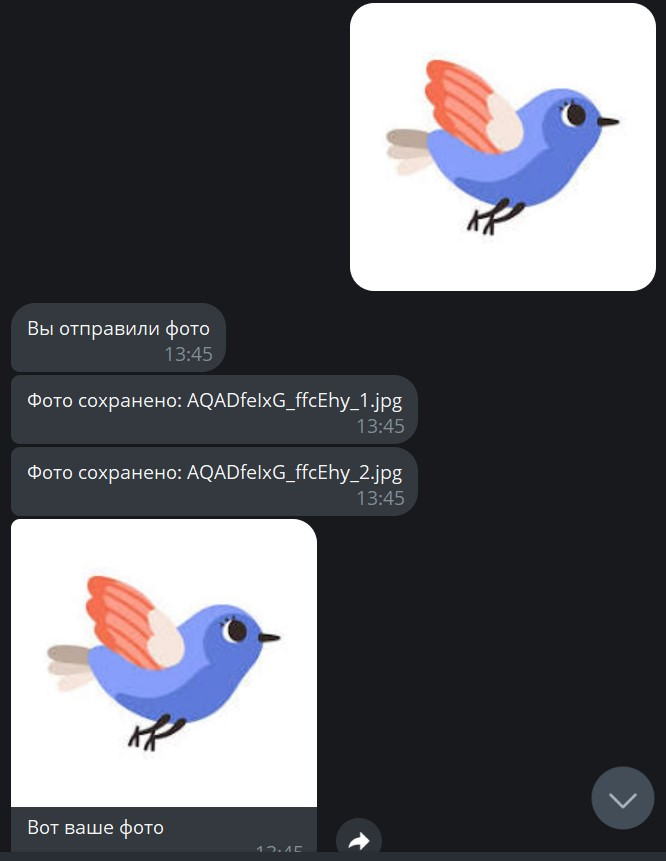

In [ ]:
#@title Обработка голосового сообщения

@dp.message(F.voice)  # Декоратор для регистрации хендлера с голосовыми сообщениями
async def handle_voice_message(message: Voice):  # Асинхронная функция-хендлер для голосовых сообщений
    # здесь message - объект класса Voice
    # https://docs.aiogram.dev/en/latest/api/types/voice.html

    await message.answer('Вы отправили голосовое сообщение')  # Ответное сообщение пользователю

    voice_file_id = message.voice.file_id  # Получаем file_id голосового сообщения для дальнейшего использования
    file_unique_id = message.voice.file_unique_id  # Получаем уникальный идентификатор голосового сообщения

    # Загрузка и сохранение голосового сообщения ***************************************************

    # Сохранение голосового сообщения (вариант 1)
    file_info = await bot.get_file(voice_file_id)  # Получаем информацию о файле по его file_id.
    file_path = file_info.file_path  # Извлекаем путь к файлу в Телеграм из информации о файле.
    await bot.download_file(file_path,  # Скачиваем файл из Телеграм по его пути
                            destination=f'{file_unique_id}_1.ogg')  # Сохраняем файл у себя с уникальным именем.
    await message.answer(f"Голосовое сообщение сохранено: {file_unique_id}_1.ogg") # сообщение пользователю

    # Сохраняем (вариант 2) голосовое сообщение в файл
    await bot.download(message.voice, destination=f'{file_unique_id}_2.ogg')  # Скачиваем и сохраняем файл
    await message.answer(f"Голосовое сообщение сохранено: {file_unique_id}_2.ogg")  # Сообщаем пользователю о сохранении

    # Отправка голосового сообщения пользователю ***************************************************

    # Отправляем назад пользователю его голосовое сообщение (вариант 1)
    await message.answer_voice(voice_file_id, caption='Вот ваше голосовое сообщение')

    # Отправляем голосовое сообщение (вариант 2) пользователю по Id
    await bot.send_voice(chat_id=message.chat.id,  # Указываем id для отправки сообщения
                         voice=voice_file_id,  # Передаем file_id сообщения
                         caption='Вот ваше голосовое сообщение')  # Добавляем подпись

    # Создаем объект FSInputFile для отправки файла из локального хранилища
    voice_file = FSInputFile(f'{file_unique_id}_1.ogg')
    # Отправляем пользователю (вариант 3 - answer_document) сохраненное голосовое сообщение с комментарием, как документ
    await message.answer_document(voice_file, caption='Вот ваше голосовое сообщение')  # Отправляем файл как документ с подписью

    # Отправляем пользователю (вариант 4 - answer_voice) сохраненное голосовое сообщение с комментарием
    await message.answer_voice(voice_file, caption='Вот опять ваше голосовое сообщение')  # Отправляем голосовое сообщение как voice с подписью

    try:
        for i in [1, 2]: # Асинхронное удаление ранее сохраненных файлов
            await asyncio.to_thread(os.remove, f'{file_unique_id}_{i}.ogg')
    except: pass


### Обработка голосовых сообщений 👇


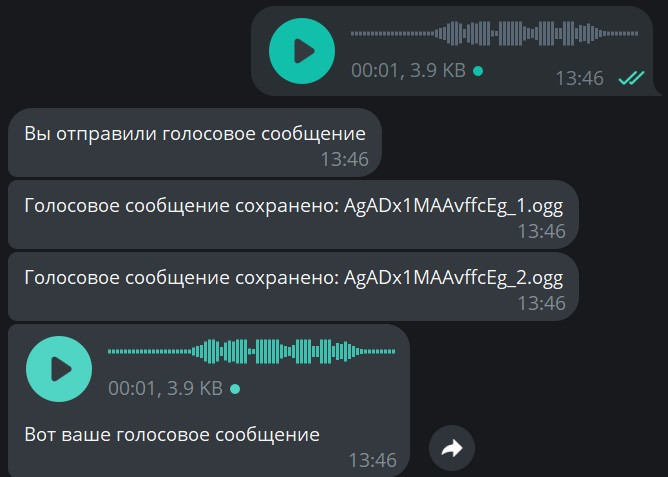

In [ ]:
#@title Обработка документов в сообщении

# В aiogram 3, когда вы работаете с типом сообщения document, это относится к различным типам файлов,
# которые пользователи могут отправлять через Telegram. В частности, в document могут попадать:
# Файлы: Это могут быть документы в различных форматах, таких как PDF, DOCX, TXT и другие.
# Изображения: Хотя изображения обычно отправляются как photo, они также могут быть отправлены как документы
# Аудиофайлы: Аудиофайл может быть отправлены как документ - файл.

@dp.message(F.document)  # Декоратор для регистрации хендлера, который будет реагировать на документы.
async def handle_document_message(message: Message):  # Определение асинхронной функции-хендлера, принимающей объект сообщения.
    # message - объект класса Message. Содержит всю информацию о сообщении, полученном ботом: текст, отправителя, время отправки и прочее.
    # https://docs.aiogram.dev/en/latest/api/types/message.html

    document = message.document  # Получаем объект документа из сообщения.
    await message.answer(f"Вы отправили файл: {document.file_name}")  # Отправляем ответ пользователю с именем файла.

    # Сохранение файла документа
    await bot.download(document, destination=f'{document.file_name}')  # Загружаем файл документа и сохраняем его с именем файла.
    await message.answer(f"Файл сохранен: {document.file_name}")  # Отправляем сообщение о том, что файл успешно сохранен.

    # Отправка документа пользователю ***************************************************

    # Отправляем назад пользователю документ (вариант 1)
    await message.answer_document(document.file_id, caption='Вот ваш файл')

    # Отправляем документ (вариант 2) пользователю по Id
    await bot.send_document(chat_id=message.chat.id,  # Указываем id для отправки сообщения
                            document=document.file_id,  # Передаем file_id сообщения
                            caption='Вот ваш файл')  # Добавляем подпись

    # Создаем объект FSInputFile для отправки документа (сохраненного файла) из локального хранилища
    document_file = FSInputFile(f'{document.file_name}')
    # Отправляем пользователю (вариант 3 - answer_document) файл с комментарием
    await message.answer_document(document_file, caption='Вот опять ваш файл')

    # Асинхронное удаление ранее сохраненного файла
    try: await asyncio.to_thread(os.remove, f'{document.file_name}')
    except: pass

### Обработка документов (файлов) 👇


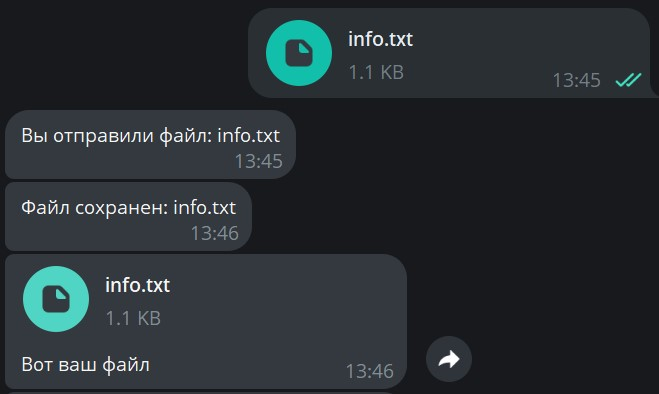

**Reply-клавиатура**
- Reply-клавиатура — это вид клавиатуры в Telegram, которая отображается внизу экрана пользователя и предоставляет ему готовые варианты ответов или действий. Reply-клавиатура заменяет обычную клавиатуру и остается видимой до тех пор, пока пользователь не выберет опцию или клавиатура не будет скрыта.
- нажатие на Reply-кнопку инициирует отправку текста, который был на кнопке, в виде обычного текстового сообщения от пользователя боту.

**Reply-клавиатуры полезны для следующих задач:**

- Упрощение взаимодействия: Пользователи могут быстро выбирать нужные действия, вместо того чтобы вручную вводить команды.

- Избежание ошибок: Поскольку пользователь выбирает готовый ответ, это снижает риск неправильного ввода.

- Повышение удобства: Reply-клавиатуры создают удобный интерфейс, который помогает пользователю лучше ориентироваться в возможностях бота.

In [ ]:
#@title Reply-клавиатура

# Нажатие на Reply-кнопку инициирует отправку текста, который был на кнопке,
# в виде обычного текстового сообщения от пользователя боту

# Импортируем класс KeyboardButton с псевдонимом KB для создания кнопок Reply-клавиатуры
from aiogram.types import KeyboardButton as KB


# Функция создания Reply-клавиатуры
async def reply_keyboard():
    # Список списков. Внутренний список - это кнопки в одну строку
    kb = [
           [KB(text="GPT-4o-mini"), KB(text="GPT-4o")],  # Создаем кнопки для первой строки клавиатуры
           [KB(text="Gemini 1.5 Flash"), KB(text="Gemini 1.5 Pro")],  # Создаем кнопки для второй строки
           [KB(text="Llama 3")]  # Создаем кнопку для третьей строки
        ]
    return ReplyKeyboardMarkup(
            keyboard=kb,  # Передаем созданные кнопки в параметр keyboard
            resize_keyboard=True, # Клавиатура будет подстраиваться под размер экрана
            one_time_keyboard=True,  # Клавиатура исчезнет после выбора варианта
            input_field_placeholder="Выберите модель LLM")  # Подсказка для поля ввода


# Функция создания такой же Reply-клавиатуры используя ReplyKeyboardBuilder
async def reply_keyboard_builder():
    # Список названий кнопок
    buttons = ["GPT-4o-mini", "GPT-4o", "Gemini 1.5 Flash", "Gemini 1.5 Pro", "Llama 3"]
    builder = ReplyKeyboardBuilder()  # Создаем экземпляр ReplyKeyboardBuilder для создания клавиатуры
    for element in buttons:
        builder.button(text=element)  # Добавляем кнопки по очереди с текстом из списка
    builder.adjust(2)  # Установка количества кнопок в одной строке
    return builder.as_markup(
                resize_keyboard=True, # Клавиатура будет подстраиваться под размер экрана
                one_time_keyboard=True,  # Клавиатура исчезнет после выбора варианта
                input_field_placeholder="Выберите модель LLM")  # Подсказка для поля ввода


# Обработчик команды /model
@dp.message(Command('model')) # Декоратор, который регистрирует хендлер для обработки команды /model
async def handle_start_command(message: Message):
    # посылаем запрос пользователю и открываем Reply-клавиатуру
    await message.answer("Выберите одну из моделей:",
                         # reply_markup=await reply_keyboard(),  # Reply-клавиатура, созданная функцией reply_keyboard
                         reply_markup=await reply_keyboard_builder(), # Reply-клавиатура, созданная reply_keyboard_builder
                         )

### Reply клавиатура (команда /model, можно выбрать в меню команд) 👇


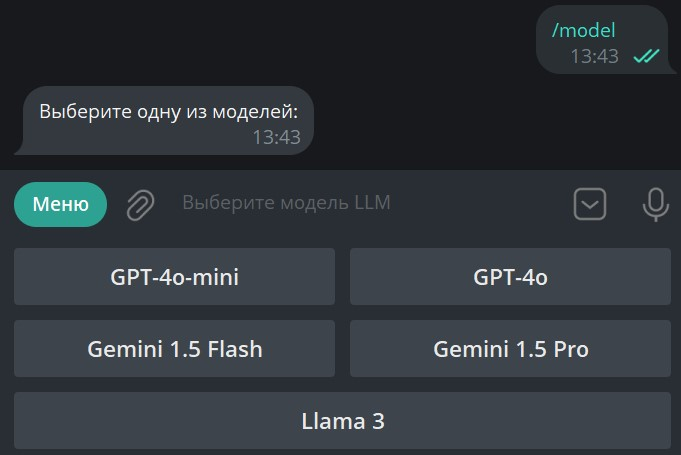


### Нажатие кнопки на Reply клавиатуре обрабатывается как текстовое сообщение, где текст - это название кнопки. Результат нажатия на кнопку GPT-4o-mini 👇


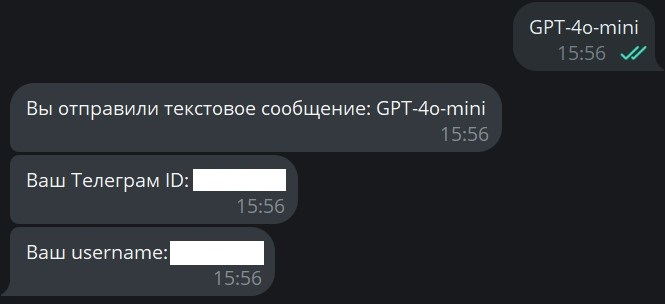

**Inline-клавиатура**

- Inline-клавиатура — это вид клавиатуры в Telegram, которая отображается непосредственно под сообщением и позволяет пользователям взаимодействовать с ботом, нажимая на кнопки. Основные отличия от Reply-клавиатуры:

- Inline-клавиатура привязывается к конкретному сообщению, а не заменяет стандартную клавиатуру пользователя.

- Кнопки Inline-клавиатуры могут выполнять действия, такие как открытие веб-ссылок, отправка callback-запросов боту, что делает их более гибкими.

**Основные возможности Inline-клавиатуры:**

- Создание кнопок с действиями, например, callback или открытие ссылки.

- Поддержка динамического изменения — кнопки могут меняться в зависимости от контекста.

- В отличие от Reply-клавиатуры, кнопки Inline-клавиатуры не закрывают стандартную клавиатуру пользователя.

**Основные варианты Inline-кнопок**
- Callback-кнопка — отправляет боту callback_data, значение которого определено в коде
- URL-кнопка — открывает указанную ссылку.

In [ ]:
#@title Inline-клавиатура

# Импортируем класс InlineKeyboardButton с псевдонимом IKB для создания кнопок Inline-клавиатуры
from aiogram.types import InlineKeyboardButton as IKB

# Функция создания Inline-клавиатуры
async def inline_keyboard():
    # Список списков. Внутренний список - это кнопки в одну строку
    kb = [
        # Первая строка кнопок
        [IKB(text="LLM/GPT", callback_data='llm'), # Создаем кнопку с callback_data 'llm'
         IKB(text="DS", callback_data='ds')], # Создаем кнопку с callback_data 'ds'
        # Вторая строка кнопок.   # Создаем кнопку для перехода по URL
        [IKB(text="Перейти на сайт УИИ", url="https://neural-university.ru/")],
    ]
    return InlineKeyboardMarkup(inline_keyboard=kb) # Возвращаем объект Inline-клавиатуру


# Функция создания такой же Inline-клавиатуры используя InlineKeyboardBuilder
async def inline_keyboard_builder():
    builder = InlineKeyboardBuilder() # Создаем экземпляр класса InlineKeyboardBuilder
    builder.button(text="LLM/GPT", callback_data='llm')  # Создаем кнопку с callback_data 'llm'
    builder.button(text="DS", callback_data='ds')  # Создаем кнопку с callback_data 'ds'
    builder.button(text="Перейти на сайт УИИ", url="https://neural-university.ru/")  # Создаем кнопку для перехода по URL
    builder.adjust(2)  # Устанавливаем количество кнопок в строке (2 кнопки в одной строке)
    return builder.as_markup() # Возвращаем объект Inline-клавиатуру


# Хендлер команды /options для отображения Inline-клавиатуры
@dp.message(Command('options'))  # Декоратор, который регистрирует хендлер для команды /options
async def handle_options_command(message: Message):
    await message.answer("Выберите одну из опций:", # Отправляем сообщение с клавиатурой
                         reply_markup=await inline_keyboard_builder()) # Получаем созданную Inline-клавиатуру


# Хендлер callback-запросов
@dp.callback_query(F.data)  # Декоратор для любых callback запросов
async def handle_callback(callback: CallbackQuery):
    if callback.data == 'llm':
        await callback.message.answer("Вы выбрали LLM/GPT")

    if callback.data == 'ds':
        await callback.message.answer("Вы выбрали DS")
    await callback.message.answer(f"Значение callback.data:  {callback.data}")
    # Убираем Inline-клавиатуру из сообщения
    await callback.message.edit_reply_markup(reply_markup=None)
    await callback.answer()  # Ответ на callback для предотвращения зависания интерфейса


### Inline клавиатура (команда /options, можно выбрать в меню команд) 👇


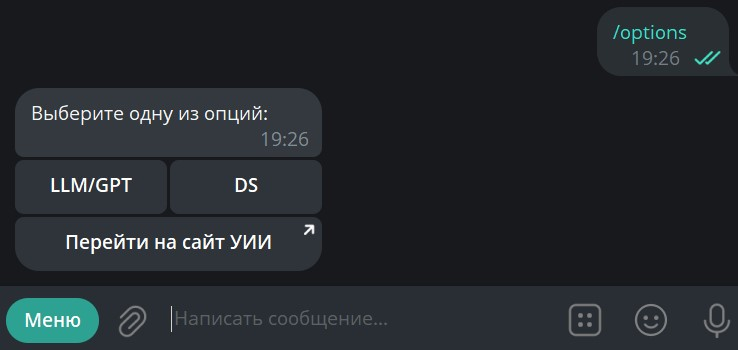


### Результат нажатия на кнопку DS 👇


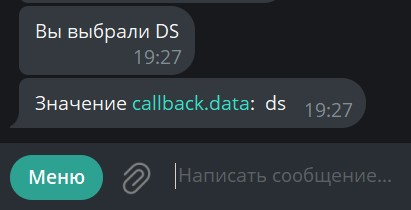

In [ ]:
#@title Запуска бота
async def main():
    try:
        print("Запуск бота...")
        await dp.start_polling(bot)  # Запускаем процесс polling для получения и обработки обновлений от Telegram
    finally:
        print("Остановка бота...")
        await bot.session.close()  # Закрываем сессию бота для корректного завершения работы и освобождения ресурсов


if __name__ == "__main__":
    asyncio.run(main())  # Запускаем асинхронную основную функцию, которая инициирует работу бота

Запуск бота...


Остановка бота...
